<center><p float="center">
  <img src="https://upload.wikimedia.org/wikipedia/commons/e/e9/4_RGB_McCombs_School_Brand_Branded.png" width="300" height="100"/>
  <img src="https://mma.prnewswire.com/media/1458111/Great_Learning_Logo.jpg?p=facebook" width="200" height="100"/>
</p></center>

<h1><center><font size=10>Artificial Intelligence and Machine Learning</center></font></h1>
<h1><center>Neural Network Project</center></h1>

**Description**

**Context**

**Part A:** A communications equipment manufacturing company has a product that is responsible for emitting informative signals.
The company wants to build a machine learning model that can help the company predict the equipment’s signal quality using various
parameters.

**Objective**

**Part A:** To build a classifier that can use the given parameters to determine the signal strength or quality.

**Data Dictionary**

**Part A**

The data set contains information on various signal tests performed:

* Parameters: Various measurable signal parameters.
* Signal_Quality: Final signal strength or quality


1 A - Read the ‘Signals.csv’ as DatFrame and import required libraries.

In [32]:
# import libraries

import pandas as pd
import numpy as np
import seaborn as sns
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report
import warnings
from sklearn.metrics import confusion_matrix
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras import optimizers, layers, models
from tensorflow.keras.losses import CategoricalCrossentropy
from keras.utils import to_categorical
warnings.filterwarnings('ignore')
import h5py
import random
random.seed(1)
np.random.seed(1)
tf.random.set_seed(1)
warnings.filterwarnings("ignore")

In [33]:
# mount google drive

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#  read signal.csv and store in dataframe

df_signal = pd.read_csv('/content/drive/MyDrive/AIMLCourse/NeuralNetworkProject/Signal.csv')
df=df_signal.copy()
df.head()

Parameter 1  Parameter 2  Parameter 3  Parameter 4  Parameter 5  \
0          7.4         0.70         0.00          1.9        0.076   
1          7.8         0.88         0.00          2.6        0.098   
2          7.8         0.76         0.04          2.3        0.092   
3         11.2         0.28         0.56          1.9        0.075   
4          7.4         0.70         0.00          1.9        0.076   

   Parameter 6  Parameter 7  Parameter 8  Parameter 9  Parameter 10  \
0         11.0         34.0       0.9978         3.51          0.56   
1         25.0         67.0       0.9968         3.20          0.68   
2         15.0         54.0       0.9970         3.26          0.65   
3         17.0         60.0       0.9980         3.16          0.58   
4         11.0         34.0       0.9978         3.51          0.56   

   Parameter 11  Signal_Strength  
0           9.4                5  
1           9.8                5  
2           9.8                5  
3           9.8                6  
4           9.4                5

1 B - Check for missing values and print percentage for each attribute.

In [ ]:
# Check for missing values and print percentage for each attribute.


missing_percentage = (df.isnull().sum() / len(df)) * 100

# Print the percentage of missing values for each attribute
print("Percentage of missing values for each attribute:")
missing_percentage

Percentage of missing values for each attribute:


Parameter 1        0.0
Parameter 2        0.0
Parameter 3        0.0
Parameter 4        0.0
Parameter 5        0.0
Parameter 6        0.0
Parameter 7        0.0
Parameter 8        0.0
Parameter 9        0.0
Parameter 10       0.0
Parameter 11       0.0
Signal_Strength    0.0
dtype: float64

* Observation: There are no missing values


1 C - Check for presence of duplicate records in the dataset and impute with appropriate method.

In [ ]:
#Check duplicate records
print("Duplicates records count is " ,df.duplicated().sum())
duplicates = df[df.duplicated()]
print(duplicates)

Duplicates records count is  240
      Parameter 1  Parameter 2  Parameter 3  Parameter 4  Parameter 5  \
4             7.4        0.700         0.00         1.90        0.076   
11            7.5        0.500         0.36         6.10        0.071   
27            7.9        0.430         0.21         1.60        0.106   
40            7.3        0.450         0.36         5.90        0.074   
65            7.2        0.725         0.05         4.65        0.086   
...           ...          ...          ...          ...          ...   
1563          7.2        0.695         0.13         2.00        0.076   
1564          7.2        0.695         0.13         2.00        0.076   
1567          7.2        0.695         0.13         2.00        0.076   
1581          6.2        0.560         0.09         1.70        0.053   
1596          6.3        0.510         0.13         2.30        0.076   

      Parameter 6  Parameter 7  Parameter 8  Parameter 9  Parameter 10  \
4            11.

* Observation : We able to see that total 240 rows are duplicate

we can drop duplicate data

In [ ]:
#Drop duplicate records
df.drop_duplicates(inplace=True)

In [ ]:
print("Duplicates records count is " ,df.duplicated().sum())

Duplicates records count is  0


* Observation: Now we can see there is no duplicate data


In [ ]:
# Check the different variable of datafram
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1359 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Parameter 1      1359 non-null   float64
 1   Parameter 2      1359 non-null   float64
 2   Parameter 3      1359 non-null   float64
 3   Parameter 4      1359 non-null   float64
 4   Parameter 5      1359 non-null   float64
 5   Parameter 6      1359 non-null   float64
 6   Parameter 7      1359 non-null   float64
 7   Parameter 8      1359 non-null   float64
 8   Parameter 9      1359 non-null   float64
 9   Parameter 10     1359 non-null   float64
 10  Parameter 11     1359 non-null   float64
 11  Signal_Strength  1359 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 138.0 KB


* Observation : We have total 11 parameter and all of Numerical type

In [ ]:
#Check five point summary
df.describe().T

count       mean        std      min      25%      50%  \
Parameter 1      1359.0   8.310596   1.736990  4.60000   7.1000   7.9000   
Parameter 2      1359.0   0.529478   0.183031  0.12000   0.3900   0.5200   
Parameter 3      1359.0   0.272333   0.195537  0.00000   0.0900   0.2600   
Parameter 4      1359.0   2.523400   1.352314  0.90000   1.9000   2.2000   
Parameter 5      1359.0   0.088124   0.049377  0.01200   0.0700   0.0790   
Parameter 6      1359.0  15.893304  10.447270  1.00000   7.0000  14.0000   
Parameter 7      1359.0  46.825975  33.408946  6.00000  22.0000  38.0000   
Parameter 8      1359.0   0.996709   0.001869  0.99007   0.9956   0.9967   
Parameter 9      1359.0   3.309787   0.155036  2.74000   3.2100   3.3100   
Parameter 10     1359.0   0.658705   0.170667  0.33000   0.5500   0.6200   
Parameter 11     1359.0  10.432315   1.082065  8.40000   9.5000  10.2000   
Signal_Strength  1359.0   5.623252   0.823578  3.00000   5.0000   6.0000   

                      75%        max  
Parameter 1       9.20000   15.90000  
Parameter 2       0.64000    1.58000  
Parameter 3       0.43000    1.00000  
Parameter 4       2.60000   15.50000  
Parameter 5       0.09100    0.61100  
Parameter 6      21.00000   72.00000  
Parameter 7      63.00000  289.00000  
Parameter 8       0.99782    1.00369  
Parameter 9       3.40000    4.01000  
Parameter 10      0.73000    2.00000  
Parameter 11     11.10000   14.90000  
Signal_Strength   6.00000    8.00000

** Observation: **
* Parameter 1 has a relatively large range (4.6 to 15.9) with a high standard deviation (1.74), suggesting a wide spread in the data.

* Parameter 2 has a smaller range (0.12 to 1.58) and a standard deviation of 0.18, indicating more consistency compared to Parameter 1.

* Parameter 3 has values ranging from 0 to 1, with a standard deviation of 0.20, indicating variability with a more concentrated distribution compared to Parameters 1 and 2.

* Parameter 4 shows a significant range (0.9 to 15.5) with a standard deviation of 1.35, suggesting some variability, but less extreme than Parameter 1.

* Parameter 6 has the largest mean (15.89) and a high standard deviation (10.45), indicating considerable variability around a high average value.

* Parameter 7 has a large range (6 to 289) with a very high standard deviation (33.41), suggesting that there might be outliers or highly skewed data in this parameter.
* Parameter 8 shows almost no variability, with values clustered very tightly around its mean (0.9967), making it the most consistent parameter.
* Parameter 5 and Parameter 9 have narrow ranges (e.g., 0.012 to 0.611 for Parameter 5) and low standard deviations, indicating these are more stable parameters.
* Signal strength has a mean of 5.62 and a range of 3 to 8, with a relatively low standard deviation (0.82), suggesting moderate stability and less variation in the data.

### Univariate Analysis

In [ ]:

#Function for plotting histogram and box plot
def plot_histogram_and_boxplot(df, feature):
    """
    Function to create a histogram and a box plot for a given feature in the DataFrame.

    Parameters:
    df (DataFrame): The DataFrame containing the data.
    feature (str): The name of the feature (column) to plot.
    """
    # Create a figure and a set of subplots (1 row, 2 columns)
    fig, ax = plt.subplots(1, 2, figsize=(12, 6))

    # Plot histogram on the first subplot (ax[0])
    sns.histplot(df[feature], kde=True, ax=ax[0], color='blue')
    ax[0].set_title(f'Histogram of {feature}')

    # Plot boxplot on the second subplot (ax[1])
    sns.boxplot(data=df[feature], ax=ax[1], color='green')
    ax[1].set_title(f'Box Plot of {feature}')

    # Adjust layout for better spacing
    plt.tight_layout()

    # Show the plots
    plt.show()

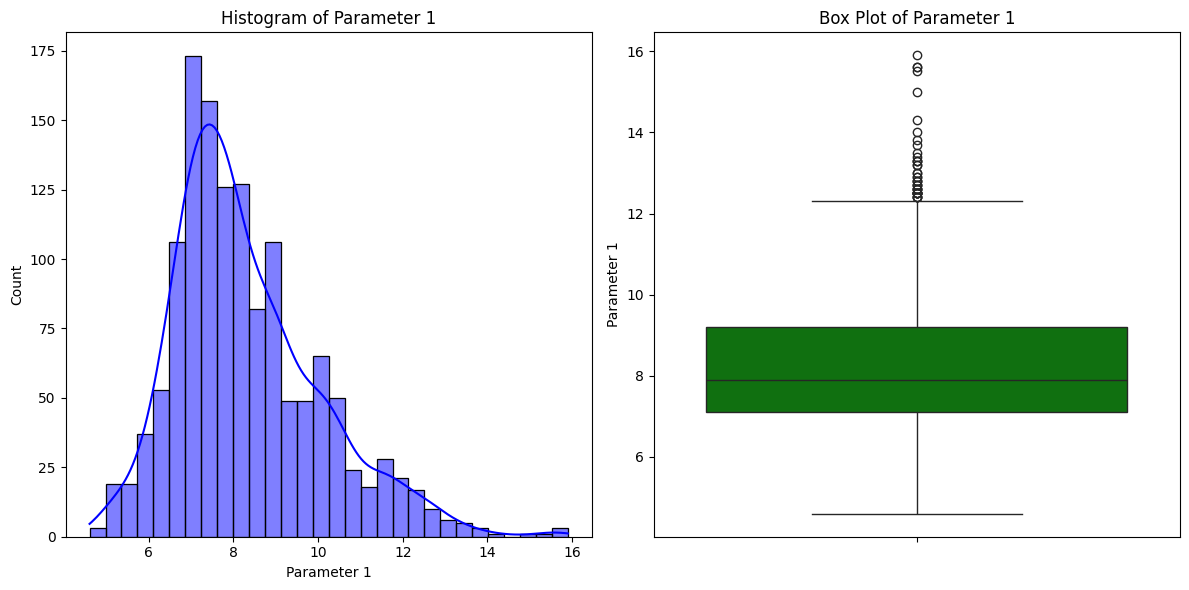

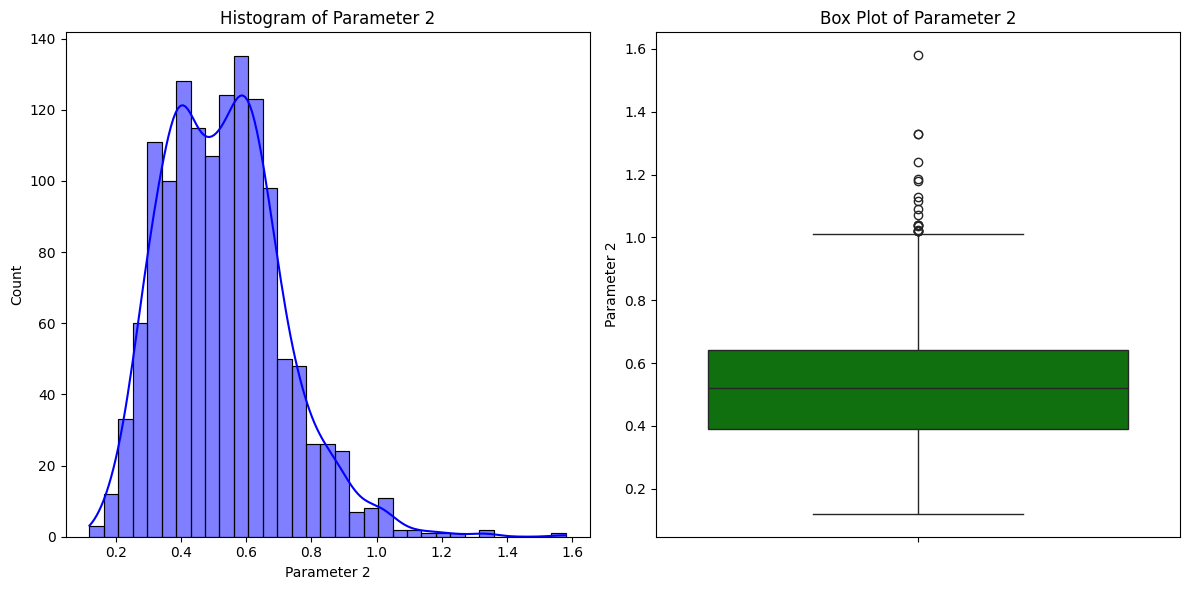

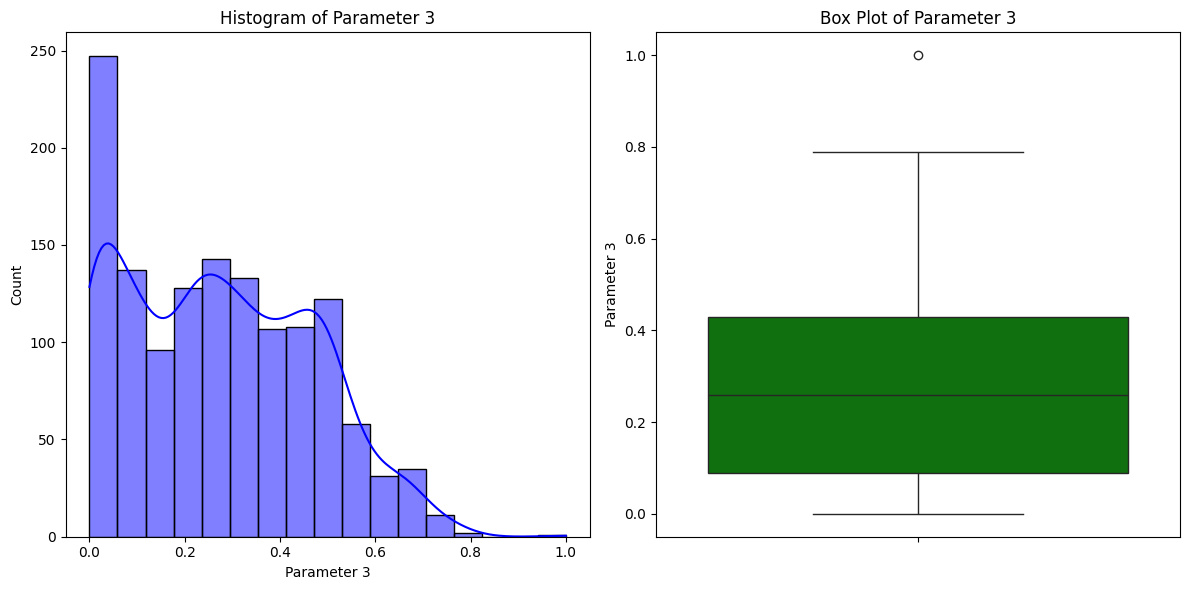

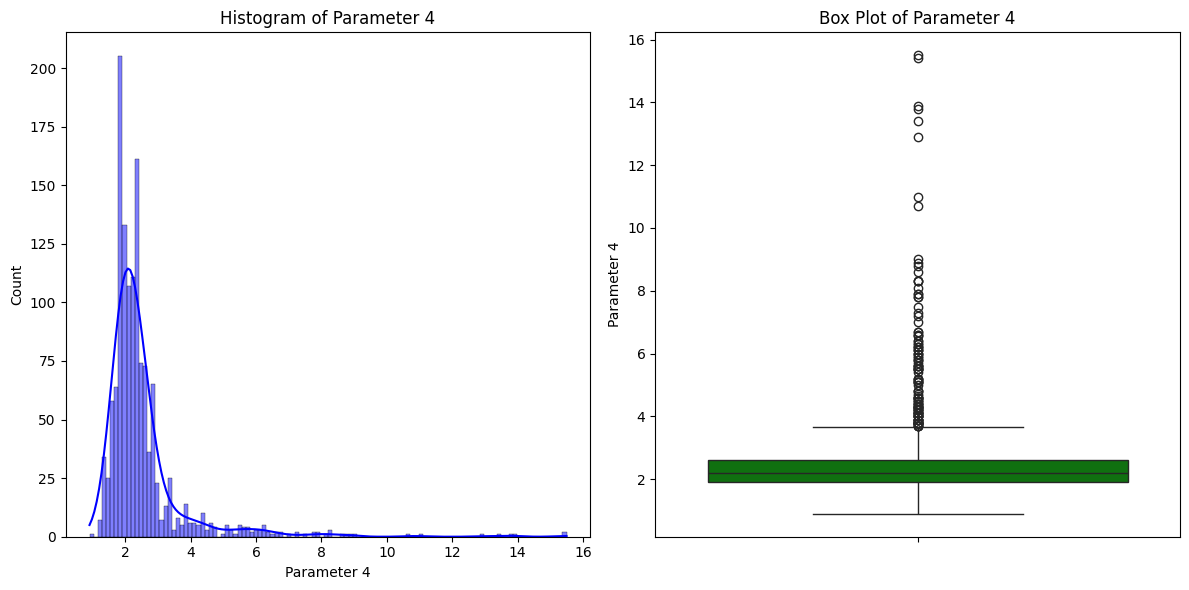

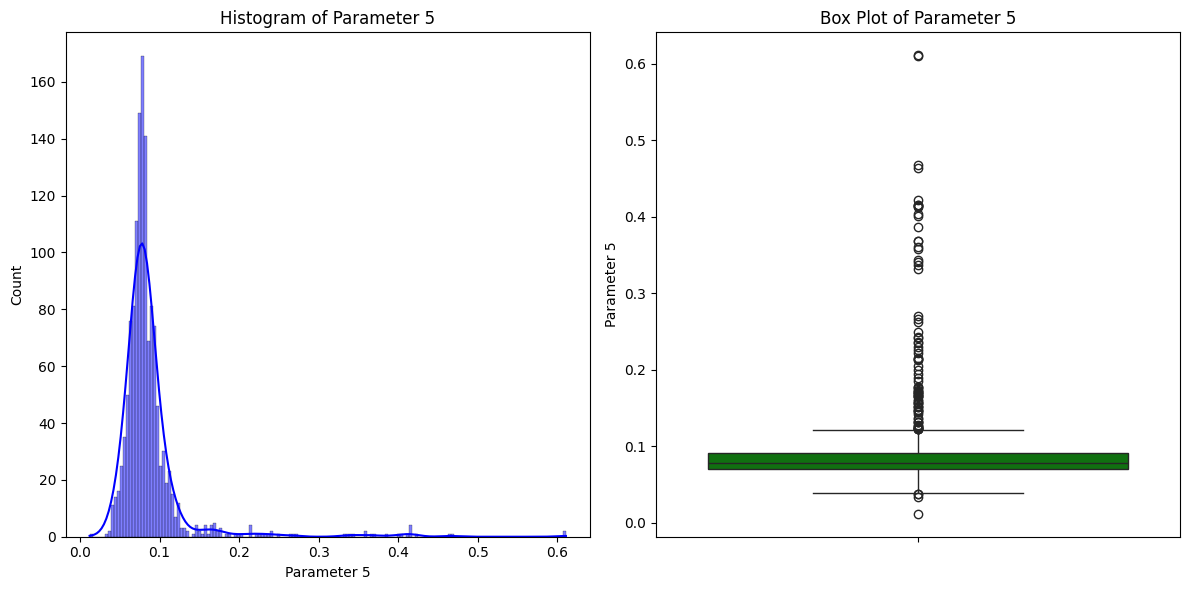

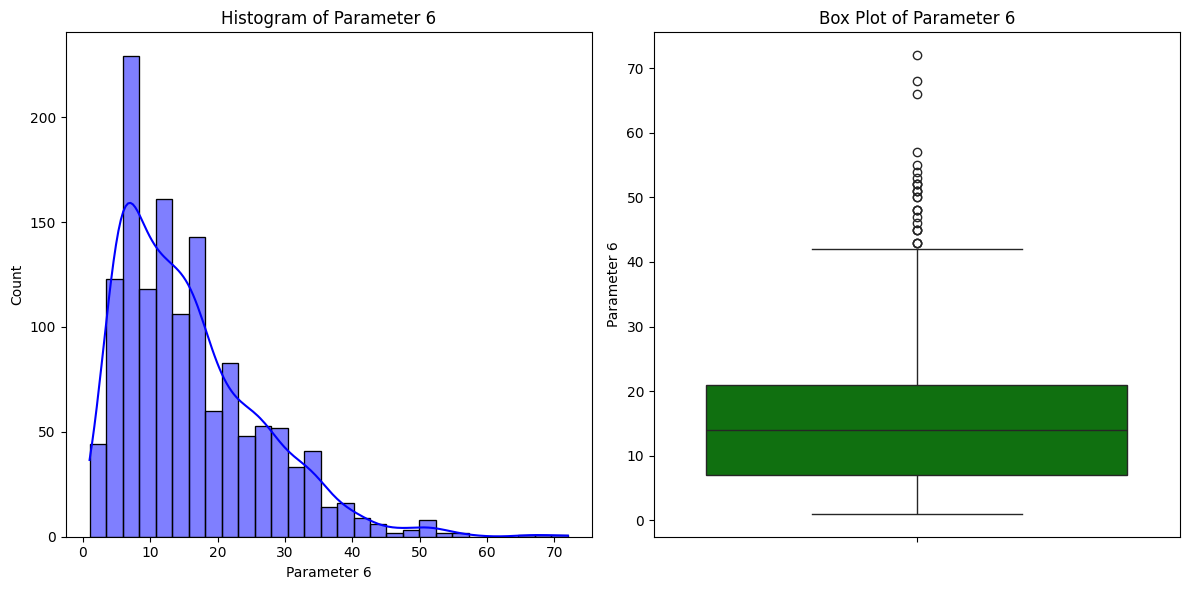

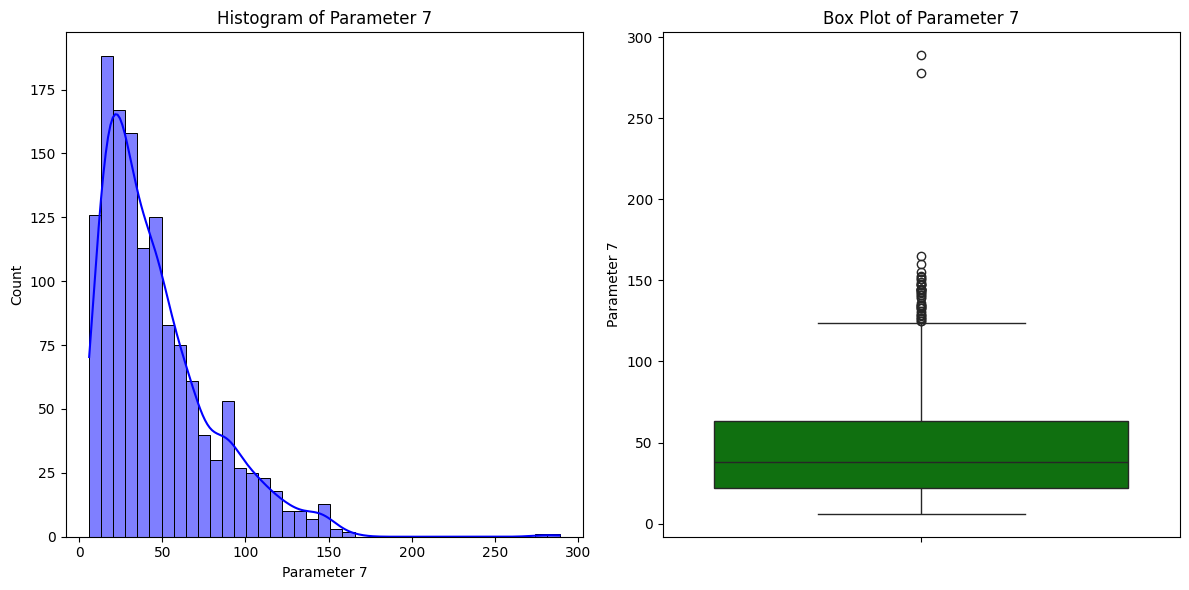

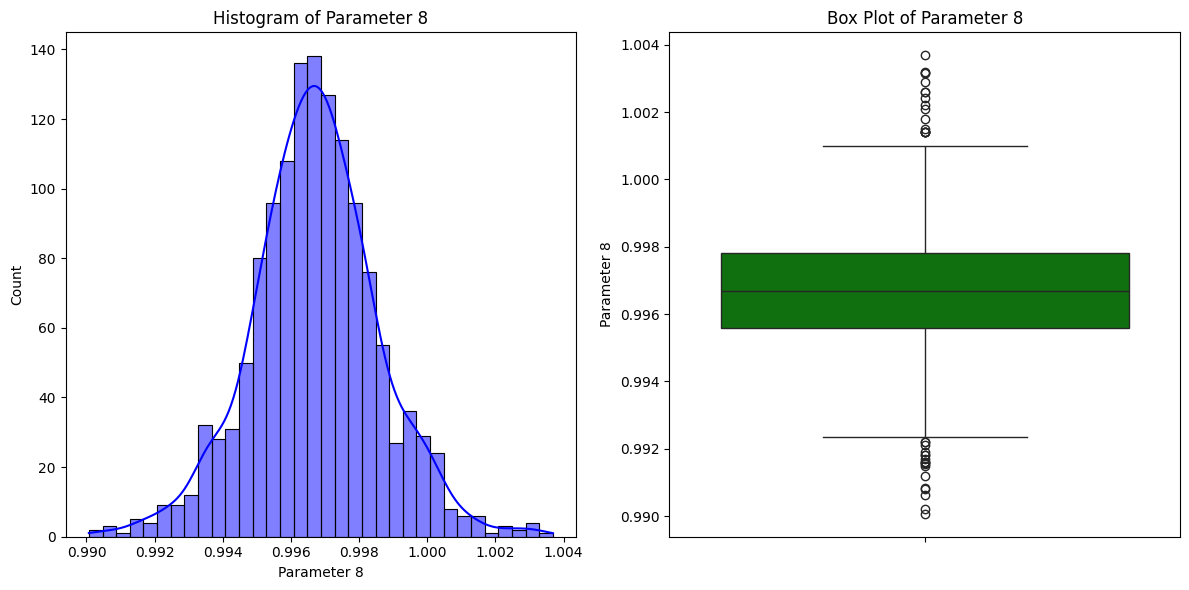

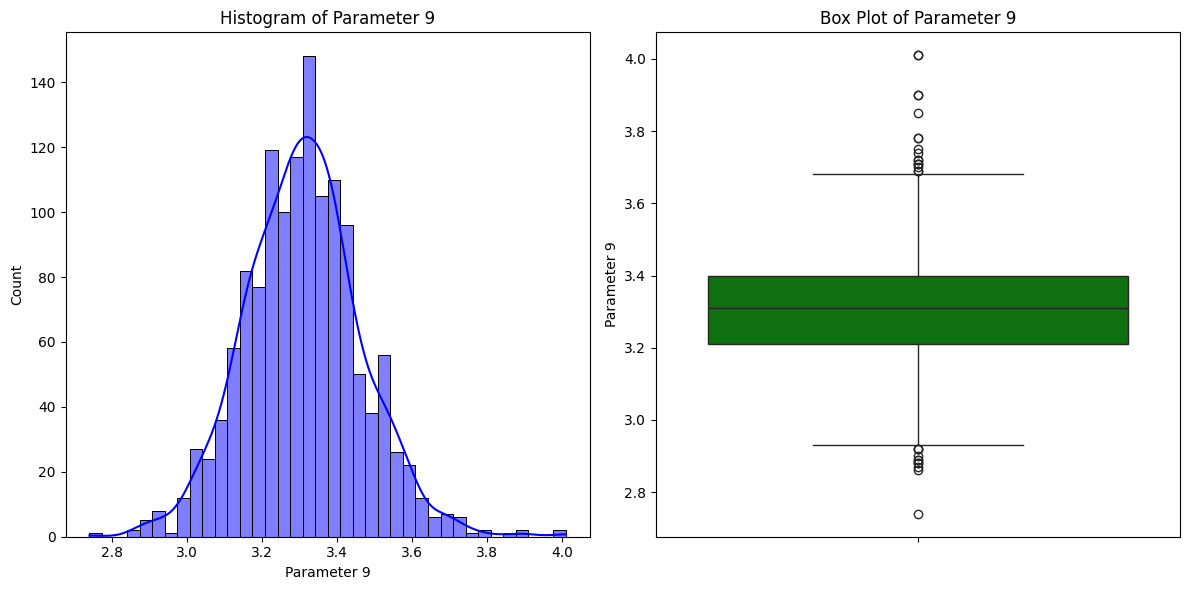

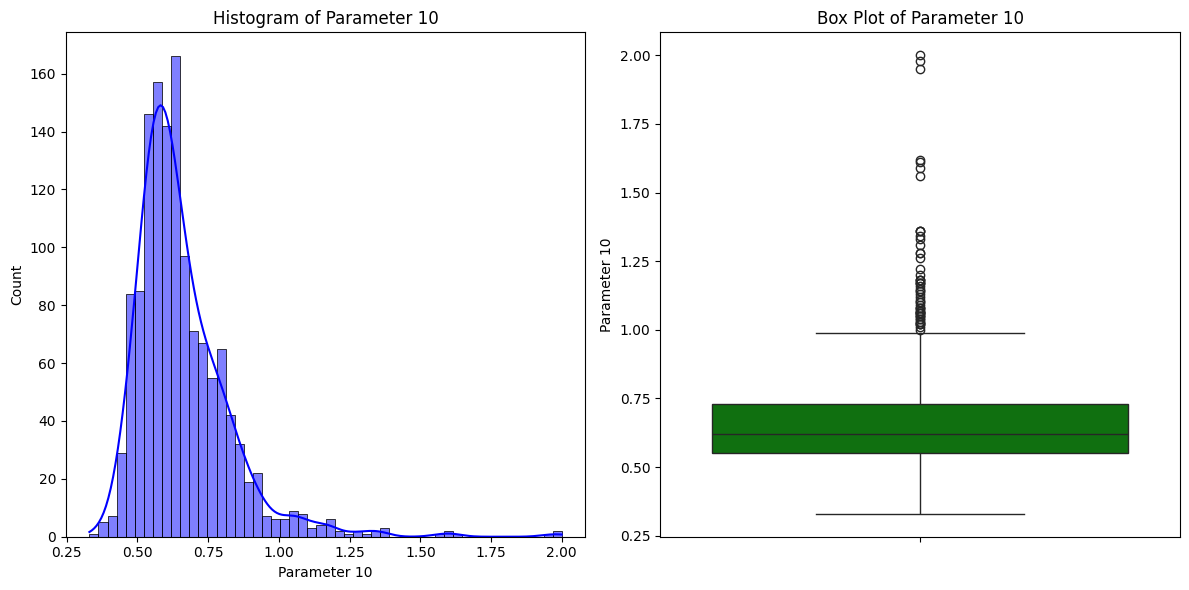

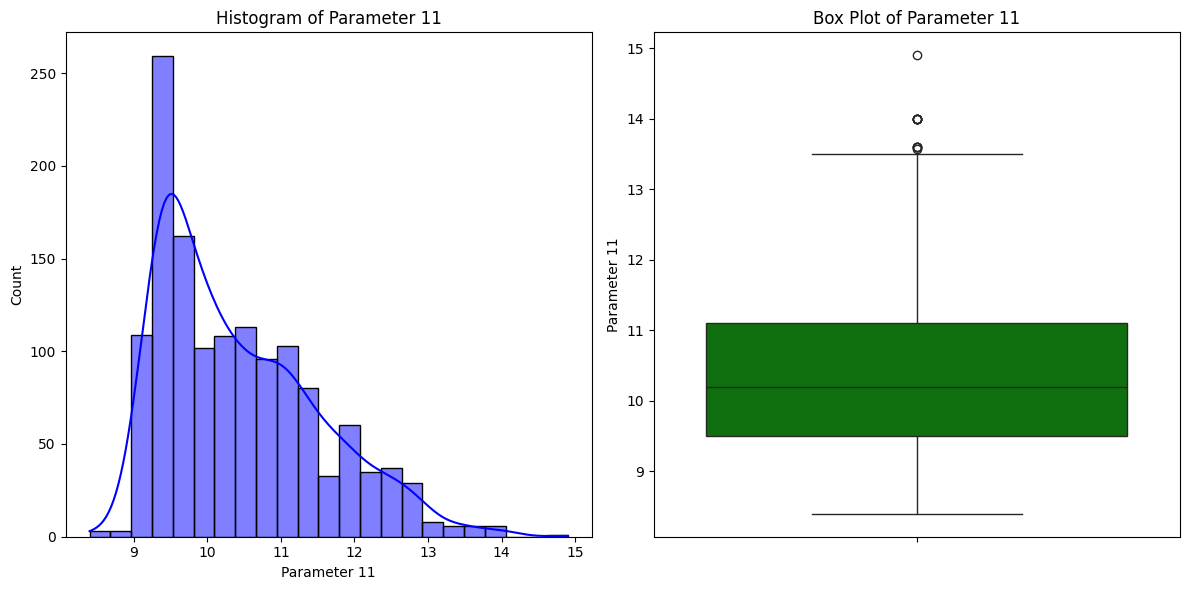

In [ ]:
numerical_columns = df.select_dtypes(include=['number']).columns
numerical_columns = [col for col in numerical_columns if col != 'Signal_Strength']
  # Loop through each numerical column and plot
for column in numerical_columns:
  plot_histogram_and_boxplot(df, column)

** Observation: **
* From historgram and box plot we can see parameter are following normal distribution but most of them are right skewed due to presence of outliers
* From  box plot we can see parameters having outliers present

 Q1 D - Visualise distribution of the target variable.

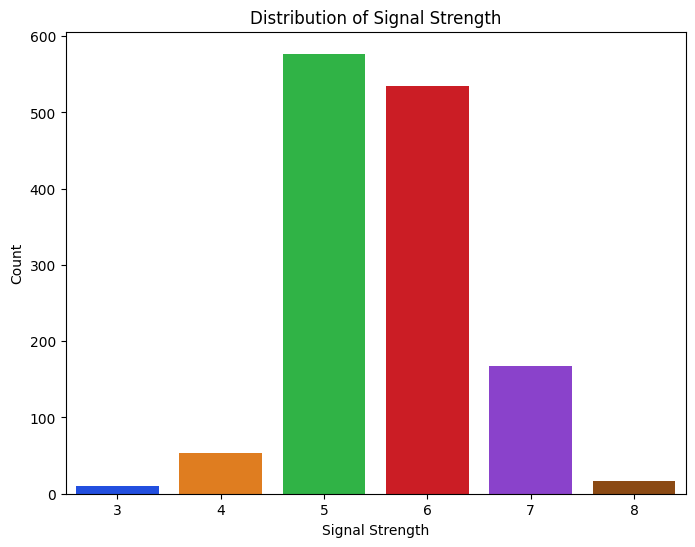

In [ ]:
# prompt:  Visualise distribution of the target variable with different color bars

# Visualise distribution of the target variable with different color bars
plt.figure(figsize=(8, 6))
sns.countplot(x='Signal_Strength', data=df, palette='bright')
plt.title('Distribution of Signal Strength')
plt.xlabel('Signal Strength')
plt.ylabel('Count')
plt.show()

In [ ]:
df['Signal_Strength'].value_counts()

Signal_Strength
5    577
6    535
7    167
4     53
8     17
3     10
Name: count, dtype: int64

** Observation: **
1. The distribution appears to be roughly centered around a value between 5 and
  6 This suggests that the average signal strength for the equipment is likely in that range.
2. class 5.0 in 'Signal_Strength' has the highest count followed by 6 and 7
    



As we have seen from box plot we need to treat outliers

In [ ]:
# Function to take care of outliers
#outliers at the upper end will be replaced by the upper whisker
#outliers at the lower end will be replaced by the lower whisker
def handleOutliers(columnIndex , columnInput , varOutlierTrackingDS):
    #Lets first identify whiskers for this(current) feature
    upper_quartile = np.percentile(columnInput, 75)
    lower_quartile = np.percentile(columnInput, 25)
    iqr = upper_quartile - lower_quartile

    # Set conventional whiskers
    upper_whisker = upper_quartile+1.5*iqr
    lower_whisker = lower_quartile-1.5*iqr

    #Check if whiskers need to overwritten
    colMax=columnInput.max()
    colMin=columnInput.min()
    if(colMax > upper_quartile and  colMax < upper_whisker):
        upper_whisker=colMax
    if(colMin < lower_quartile and  colMin > lower_whisker):
        lower_whisker=colMin

    #Identify and replace ouliers
    countOfOutliers=0
    for j in range(len(columnInput)):
      if columnInput.iloc[j] > upper_whisker:
          columnInput.iloc[j] = upper_whisker
          countOfOutliers += 1
      if columnInput.iloc[j] < lower_whisker:
          columnInput.iloc[j] = lower_whisker
          countOfOutliers += 1

    varOutlierTrackingDS = pd.concat([varOutlierTrackingDS, pd.DataFrame([{'Feature_Label': columnIndex, 'NoOfOutliersHandled': countOfOutliers, 'UpWhisker': upper_whisker, 'LowWhisker': lower_whisker}])], ignore_index=True)
    return varOutlierTrackingDS


In [ ]:
# Data structure to keep track of outliers
varOutlierTrackingDS=pd.DataFrame(columns=['Feature_Label','NoOfOutliersHandled','UpWhisker','LowWhisker'])

#Outer loop for all columns
varDSColList=np.arange(0,df.columns.size-1,1)

for i in varDSColList:
    temp=df.iloc[:,i]
    varOutlierTrackingDS=handleOutliers(i,temp,varOutlierTrackingDS)

#Lets have a look at the data on outliers
varOutlierTrackingDS
#Lets check how many variables contained outliers that were replaced
#varOutlierTrackingDS[varOutlierTrackingDS['NoOfOutliersHandled'] != 0.0]

Feature_Label NoOfOutliersHandled  UpWhisker  LowWhisker
0              0                  41   12.35000     4.60000
1              1                  19    1.01500     0.12000
2              2                   1    0.94000     0.00000
3              3                 126    3.65000     0.90000
4              4                  87    0.12250     0.03850
5              5                  26   42.00000     1.00000
6              6                  45  124.50000     6.00000
7              7                  35    1.00115     0.99227
8              8                  28    3.68500     2.92500
9              9                  55    1.00000     0.33000
10            10                  12   13.50000     8.40000

In [ ]:
def plot_boxplot(df, feature):
    """
    Function to create a boxplot for a specific feature in the DataFrame.

    Parameters:
    df (DataFrame): The input DataFrame.
    feature (str): The feature/column name for which to plot the boxplot.
    """
    plt.figure(figsize=(8, 6))
    sns.boxplot(data=df, x=feature)
    plt.title(f'Boxplot of {feature}')
    plt.show()

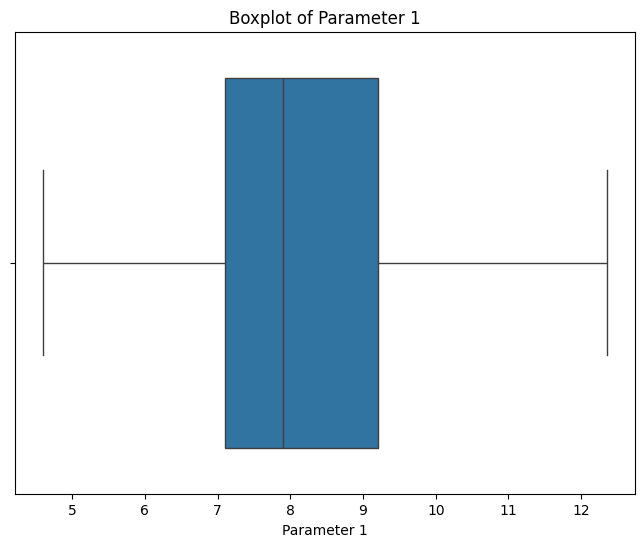

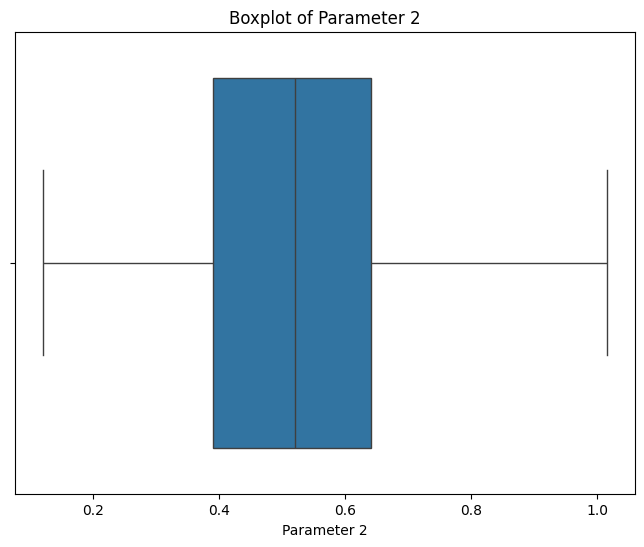

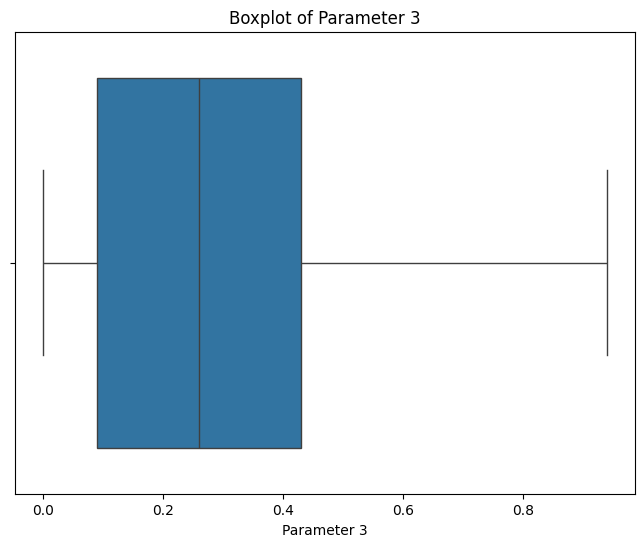

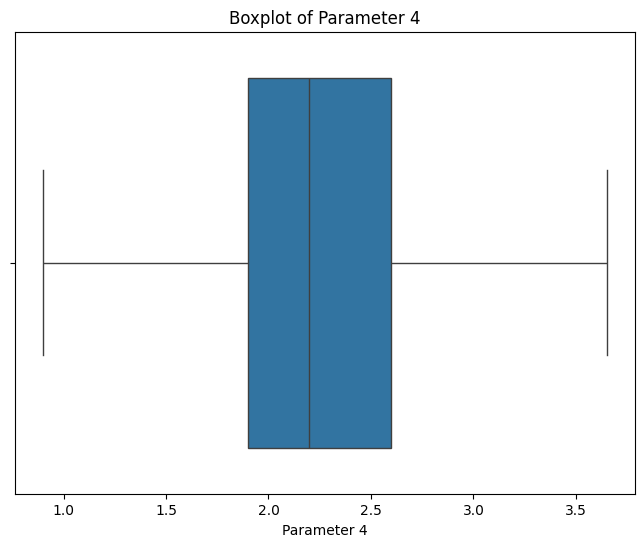

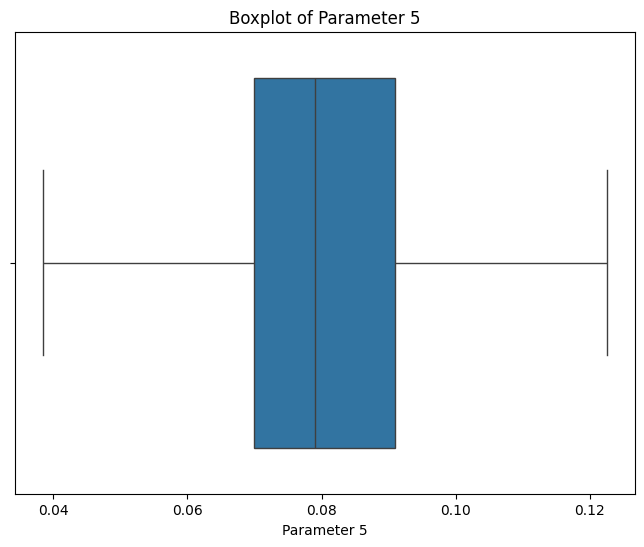

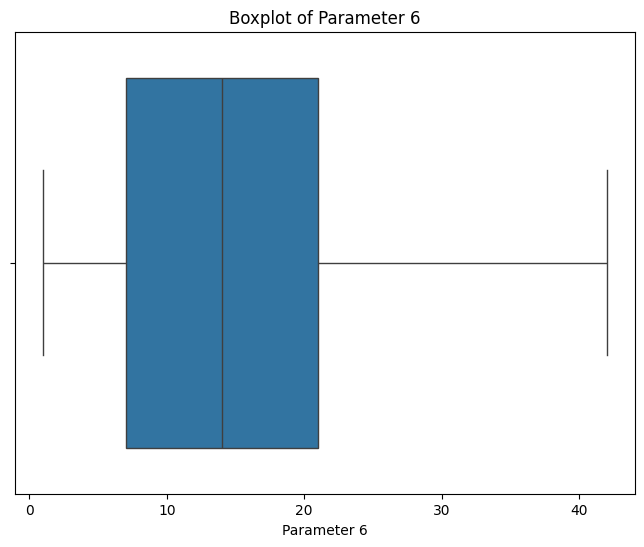

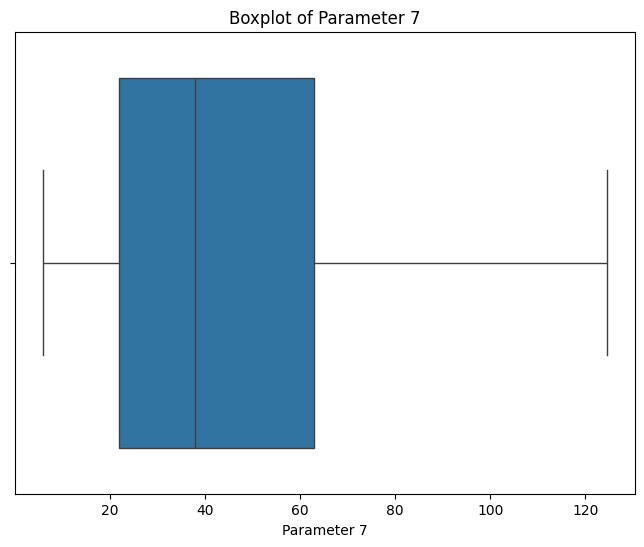

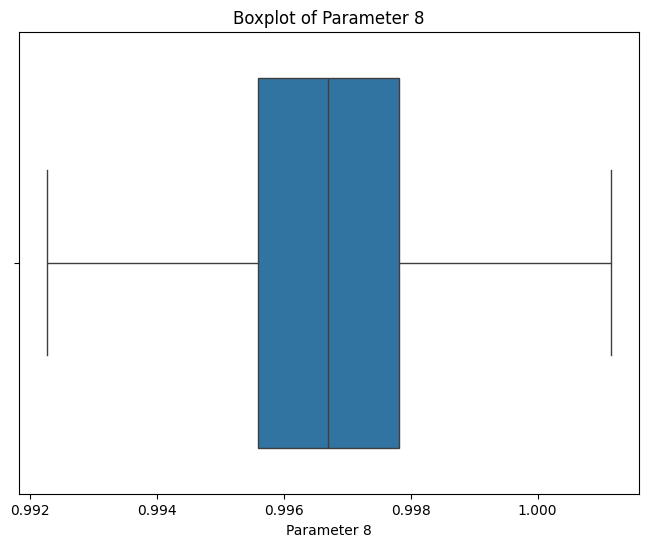

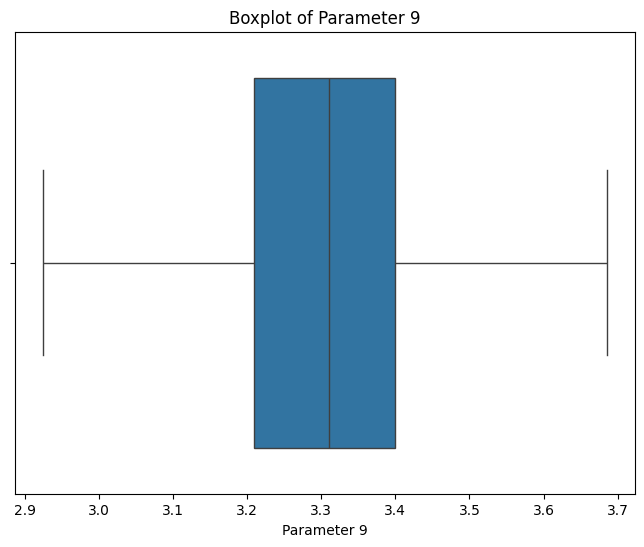

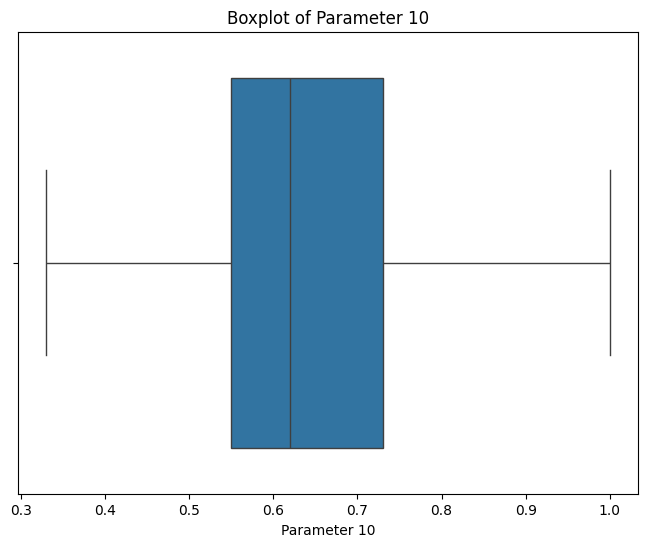

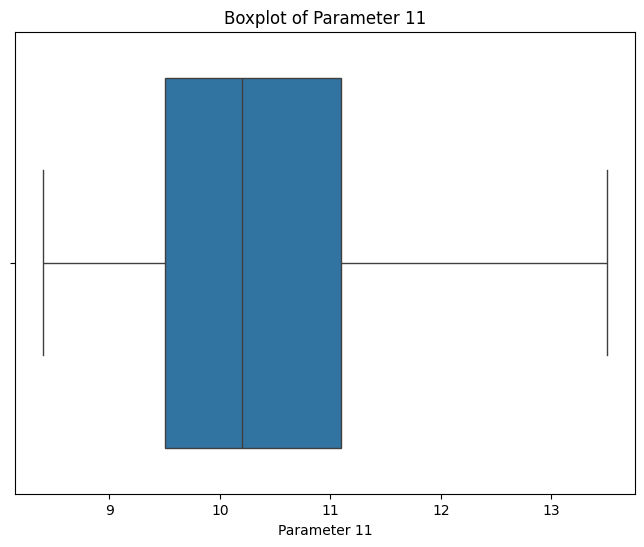

In [ ]:
numerical_columns = df.select_dtypes(include=['number']).columns
numerical_columns = [col for col in numerical_columns if col != 'Signal_Strength']
  # Loop through each numerical column and plot
for column in numerical_columns:
  plot_boxplot(df, column)

** Observation: **
* We can see that their is no outlier present in data now

### Bivariate Analysis

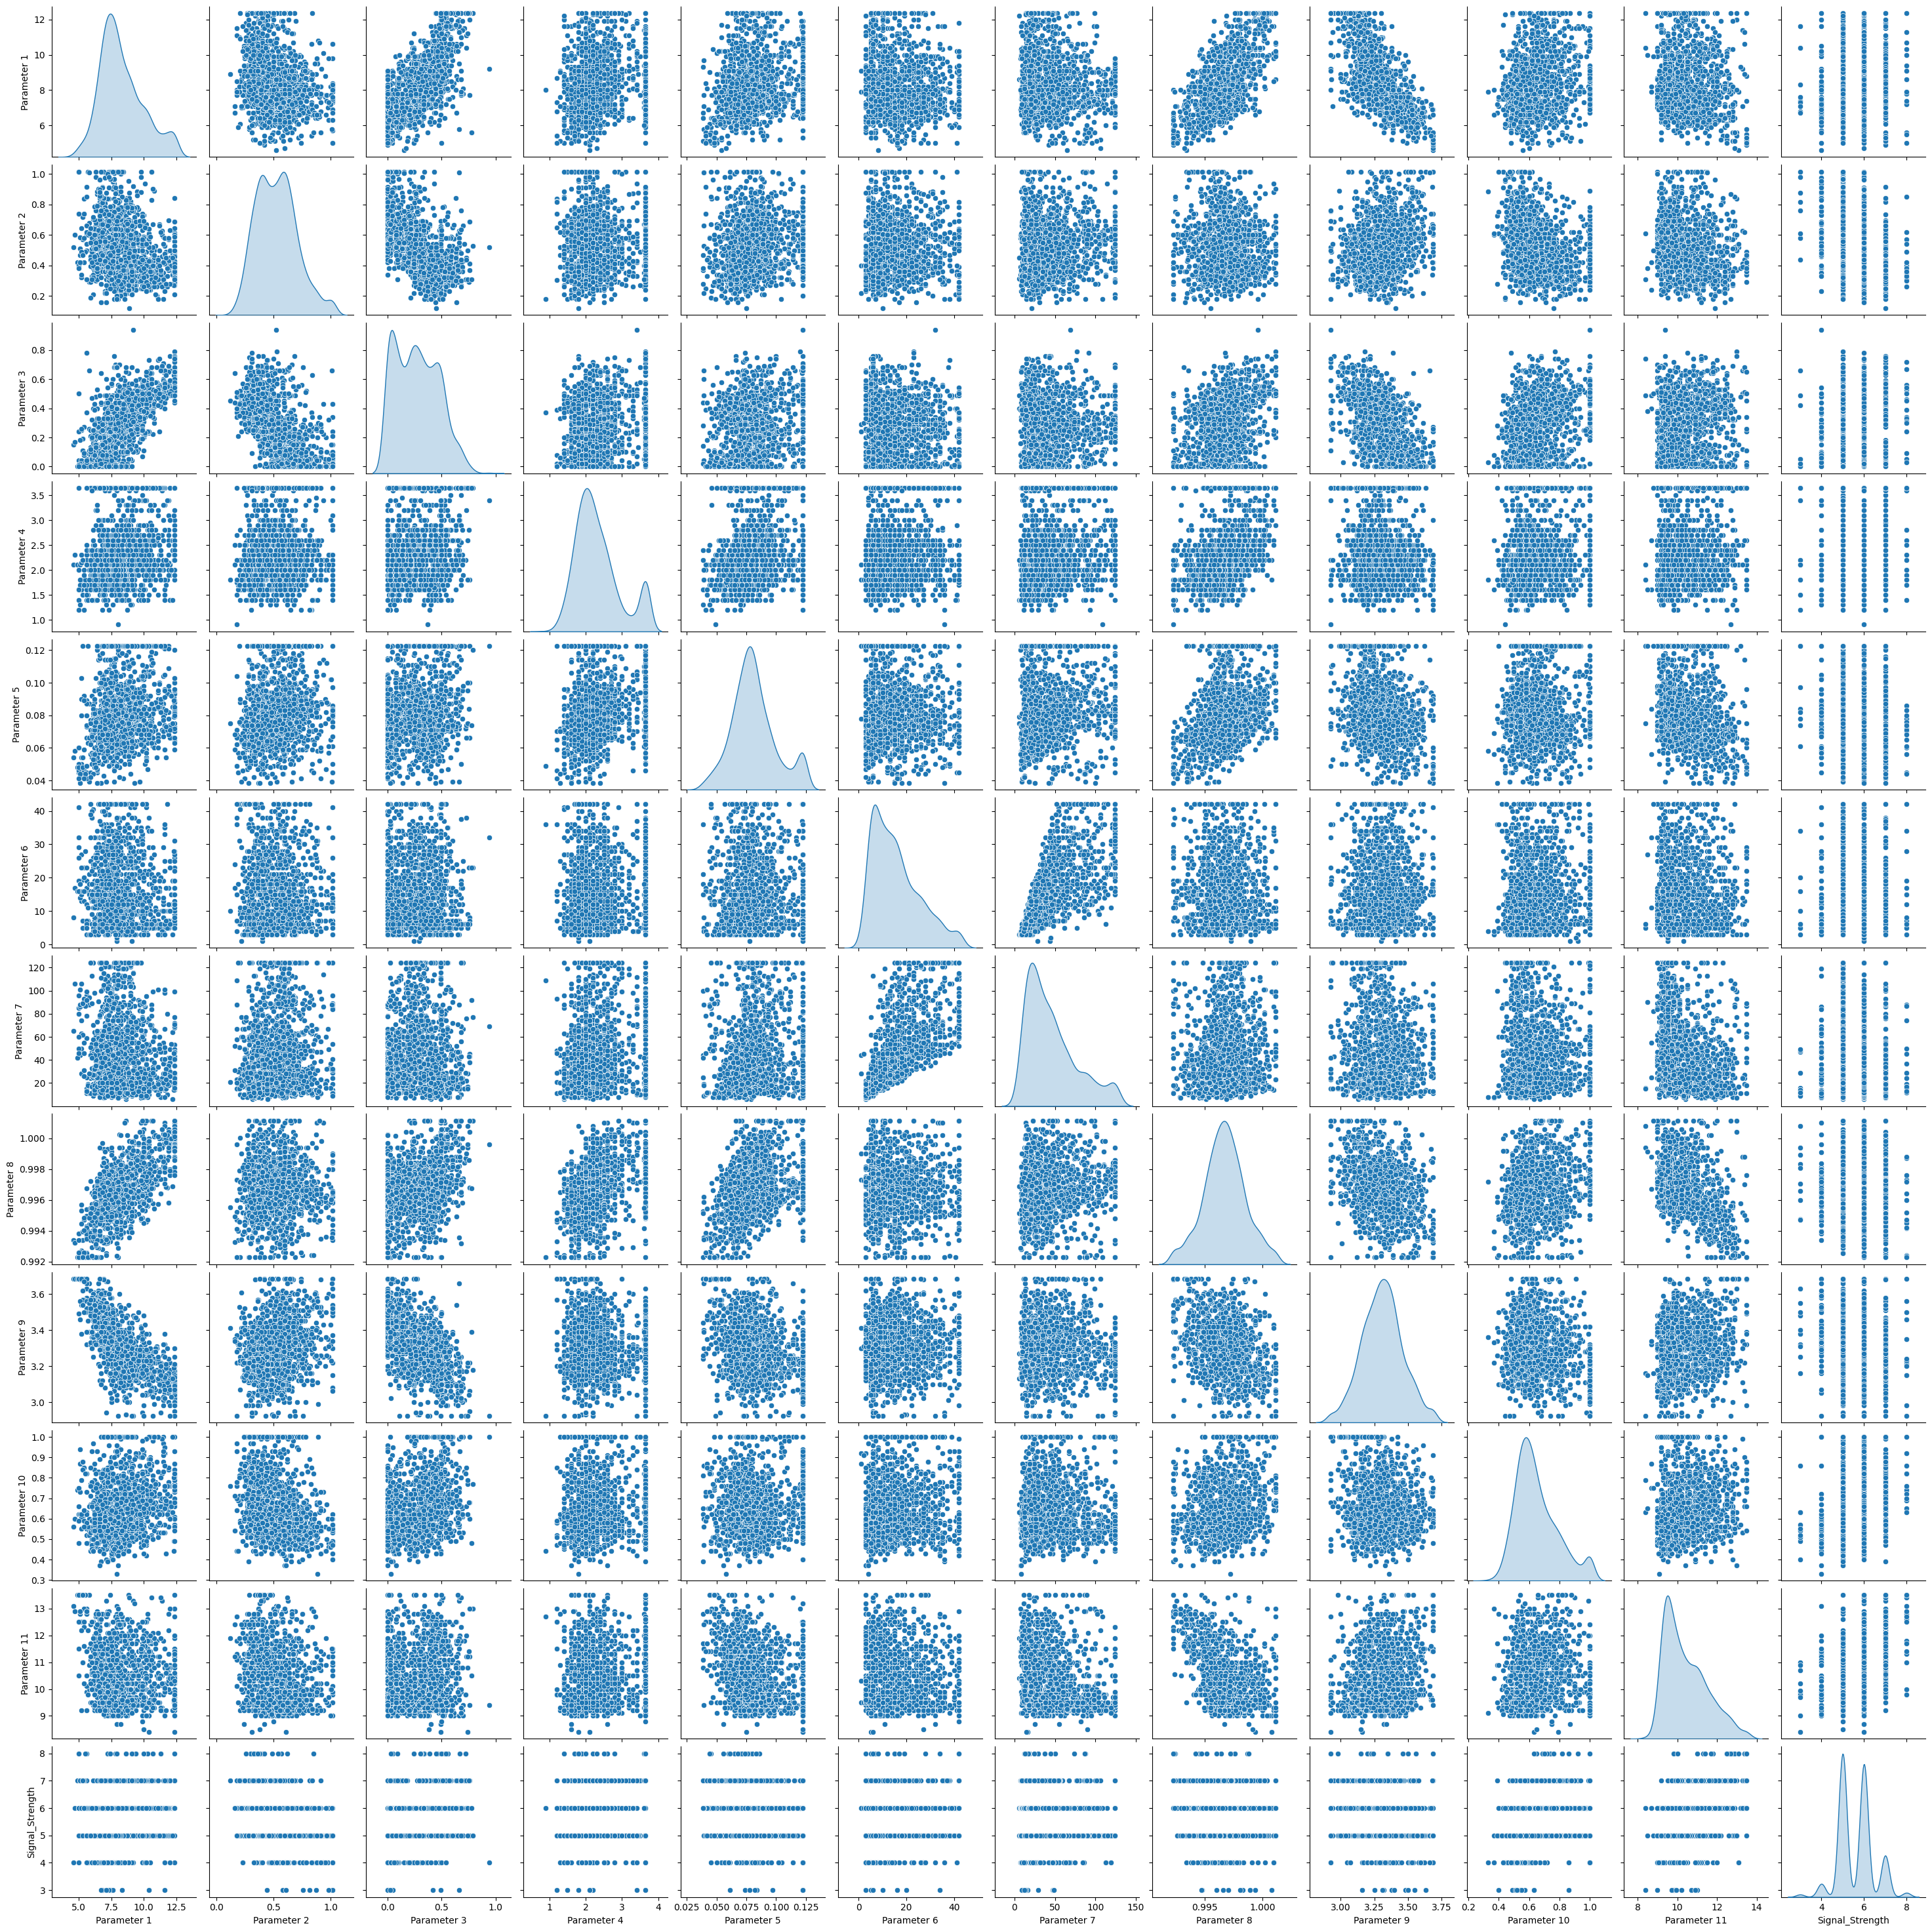

In [ ]:
#Pair plot
sns.pairplot(df,diag_kind="kde")

**Observation**

1. Parameter 6 and Parameter 7 are highly correlated with each other and visce versa and they have almost 0 correlation with other Parameters
2. Parameter 1 is positively correlated to Parameter 3 and Parameter 8 and negatively correlated to Parameter 2 and Parameter 9.
3. Parameter 4 is has very low correlation with other Parameters.


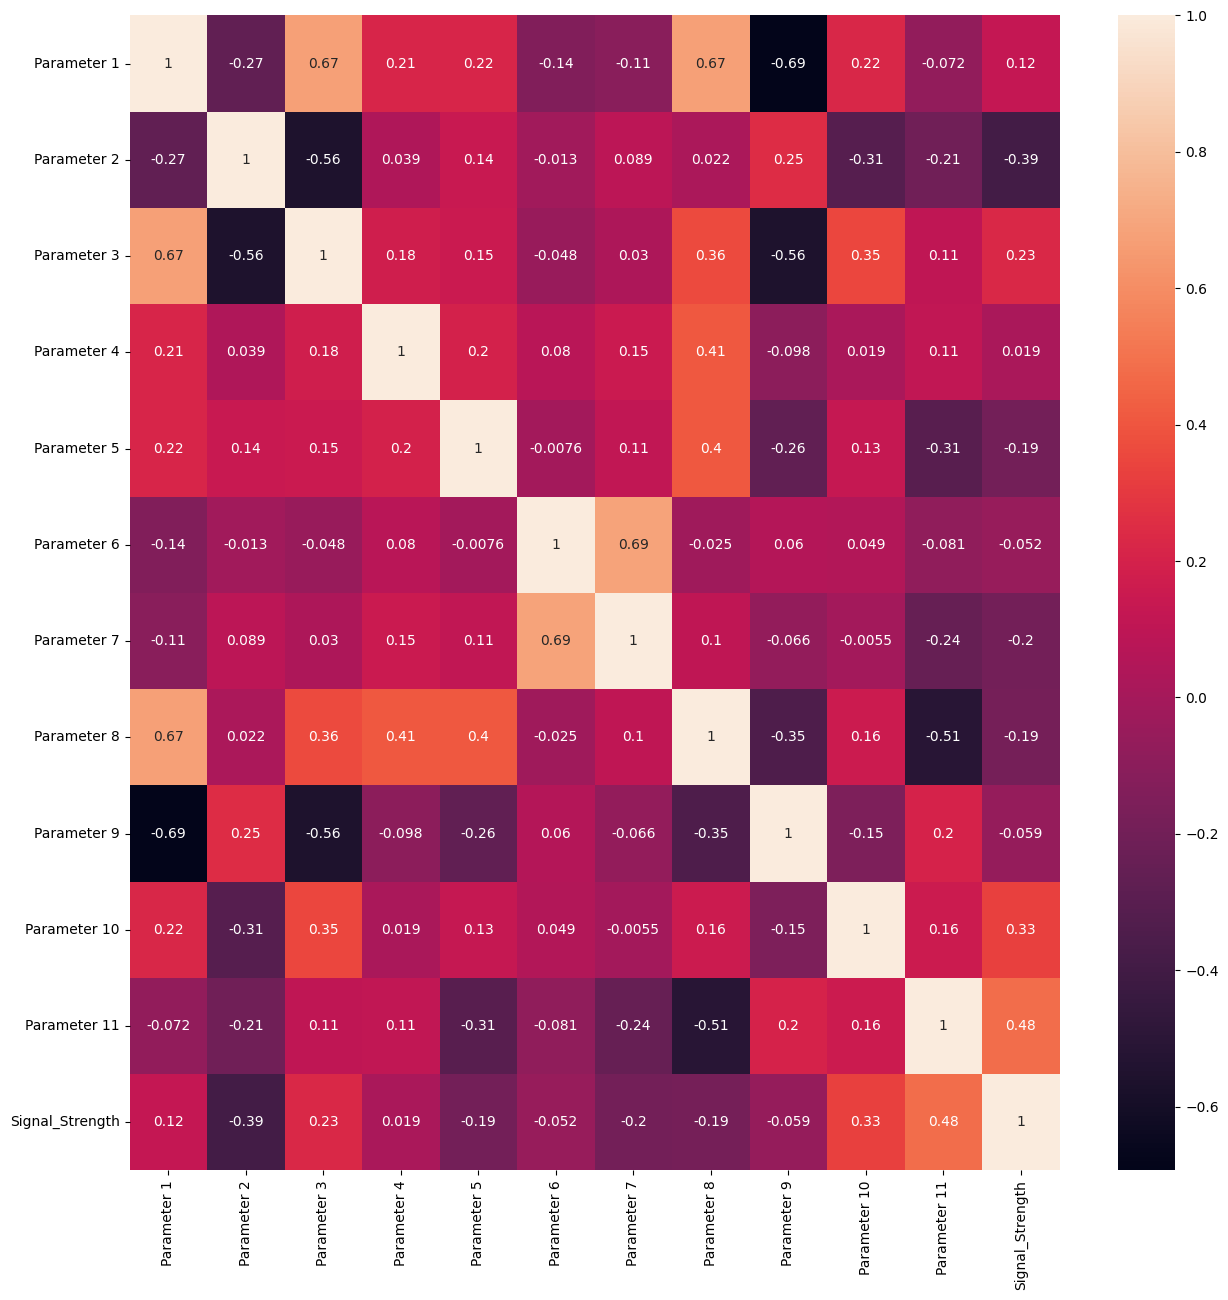

In [ ]:
# Heat Map
plt.figure(figsize=(15,15))
sns.heatmap(df.corr(), annot=True )  # heatmap
plt.show()

* Observation:

    *  Parameter 11, Parameter 10 and Parameter 3 are positvely correlated with Signal_Strength.
    * Parameter 2  is negatively correlated with Signal_Strength.
    * Some variables are higly correlated , some are not correlated with each other

2 A - Split the data into X & Y.

In [ ]:
X=df.drop(columns=['Signal_Strength'],axis=1)
Y=df['Signal_Strength']

2 B - Split the data into train & test with 70:30 proportion.

In [ ]:
from sklearn.model_selection import train_test_split
X_Train, X_Test, Y_Train, Y_Test=train_test_split(X,Y,test_size=0.3,random_state=1)

2 C - Print shape of all the 4 variables and verify if train and test data is in sync.

In [ ]:
print("X_Train.shape",X_Train.shape)
print("X_Test.shape",X_Test.shape)
print("Y_Train.shape",Y_Train.shape)
print("Y_Test.shape",Y_Test.shape)

X_Train.shape (951, 11)
X_Test.shape (408, 11)
Y_Train.shape (951,)
Y_Test.shape (408,)


2 D - Normalise the train and test data with appropriate method.

In [ ]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
scaler = StandardScaler()

# Fit the scaler to the training data
X_train_scaled  = pd.DataFrame(scaler.fit_transform(X_Train))

# Transform the test data using the same scaler
X_test_scaled  = pd.DataFrame(scaler.transform(X_Test))

print("X_Train.shape",X_train_scaled.shape)
print("X_Test.shape",X_test_scaled.shape)
print("Y_Train.shape",Y_Train.shape)
print("Y_Test.shape",Y_Test.shape)

X_Train.shape (951, 11)
X_Test.shape (408, 11)
Y_Train.shape (951,)
Y_Test.shape (408,)


Q2 E - Transform Labels into format acceptable by Neural Network

In [ ]:

from keras.utils import to_categorical
Y_train_encoded = to_categorical(Y_Train)
Y_test_encoded = to_categorical(Y_Test)

### Model Training & Evaluation using Neural Network

3 A - Design a Neural Network to train a classifier.

In [ ]:
# Initialize the neural network model
model = Sequential()

# Add layers to the model
model.add(Dense(64, activation='relu', input_shape=(11,)))  # Input layer with 11 input features
model.add(Dense(32, activation='relu'))  # Hidden layer
model.add(Dense(16, activation='relu'))  # Hidden layer
model.add(Dense(9, activation='softmax'))  # Output layer with six neurons for six classes

# Compile the model
model.compile(optimizer='adam', loss='CategoricalCrossentropy', metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 64)                  │             768 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 9)                   │             153 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,529 (13.79 KB)

 Trainable params: 3,529 (13.79 KB)

 Non-trainable params: 0 (0.00 B)

3 B - Train the classifier using previously designed Architecture

In [ ]:
history = model.fit(X_train_scaled, Y_train_encoded, epochs=100, batch_size=32, validation_split=0.2)

Epoch 1/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 8s 191ms/step - accuracy: 0.1998 - loss: 2.1274 - val_accuracy: 0.4921 - val_loss: 1.7458
Epoch 2/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5049 - loss: 1.5921 - val_accuracy: 0.5602 - val_loss: 1.3358
Epoch 3/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5562 - loss: 1.1894 - val_accuracy: 0.5393 - val_loss: 1.2579
Epoch 4/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5815 - loss: 1.0856 - val_accuracy: 0.5497 - val_loss: 1.1955
Epoch 5/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5968 - loss: 1.0346 - val_accuracy: 0.5654 - val_loss: 1.1565
Epoch 6/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6009 - loss: 0.9981 - val_accuracy: 0.5654 - val_loss: 1.1326
Epoch 7/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6087 - loss: 0.9696 - val_accuracy: 0.5812 - val_loss: 1.1176
Epoch 8/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6133 - loss: 0.9447 - val_accuracy: 0.5707 -

3 C - Plot 2 separate visuals. i. Training Loss and Validation Loss ii. Training Accuracy and Validation Accuracy

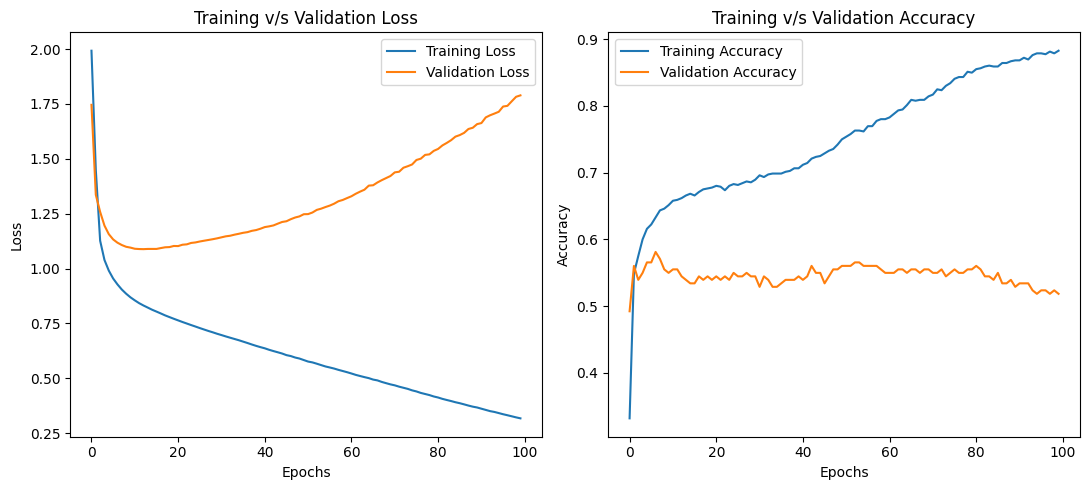

In [ ]:
plt.figure(figsize=(11, 5))

# Plotting training and validation loss
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training v/s Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Plotting training and validation accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training v/s Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

### Model performance with test data

In [ ]:
y_pred = model.predict(X_test_scaled)

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step


In [ ]:
y_pred[0]

array([1.01690734e-09, 1.39581440e-08, 1.60908870e-10, 2.75499269e-13,
       3.86062876e-10, 8.84771571e-02, 7.07040787e-01, 1.12097144e-01,
       9.23849046e-02], dtype=float32)

In [ ]:
import numpy as np

y_pred_final=[]

for i in y_pred:
  y_pred_final.append(np.argmax(i))

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(Y_Test,y_pred_final))

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         3
           4       0.00      0.00      0.00        19
           5       0.56      0.72      0.63       167
           6       0.54      0.45      0.49       172
           7       0.38      0.34      0.36        44
           8       0.00      0.00      0.00         3

    accuracy                           0.52       408
   macro avg       0.25      0.25      0.25       408
weighted avg       0.50      0.52      0.50       408



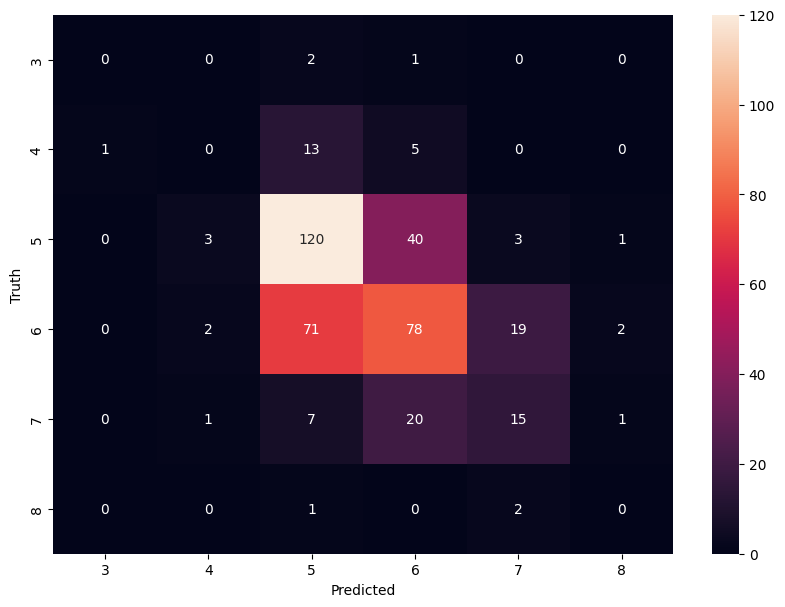

In [ ]:
cm = confusion_matrix(Y_Test,y_pred_final)
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt='g', xticklabels=np.unique(Y_Test), yticklabels=np.unique(Y_Test))
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()

3 d - Design new architecture/update existing architecture in attempt to improve the performance of the model.

In [ ]:
# Define a new model with dropout layers
model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(11,)))
model.add(Dropout(0.5))  # Adding dropout layer with 30% dropout rate
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(9, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                      │ (None, 64)                  │             768 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 9)                   │             297 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,145 (12.29 KB)

 Trainable params: 3,145 (12.29 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
history = model.fit(X_train_scaled, Y_train_encoded, epochs=100, batch_size=32,  validation_split=0.2)

Epoch 1/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 6s 164ms/step - accuracy: 0.1925 - loss: 2.0772 - val_accuracy: 0.4241 - val_loss: 1.7116
Epoch 2/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.3463 - loss: 1.7433 - val_accuracy: 0.4817 - val_loss: 1.4813
Epoch 3/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4028 - loss: 1.5378 - val_accuracy: 0.4921 - val_loss: 1.3661
Epoch 4/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4346 - loss: 1.3514 - val_accuracy: 0.5183 - val_loss: 1.3077
Epoch 5/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4504 - loss: 1.2820 - val_accuracy: 0.5445 - val_loss: 1.2653
Epoch 6/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4622 - loss: 1.2765 - val_accuracy: 0.5497 - val_loss: 1.2353
Epoch 7/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4939 - loss: 1.2327 - val_accuracy: 0.5550 - val_loss: 1.2142
Epoch 8/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5285 - loss: 1.1657 - val_accuracy: 0.5602 -

3 E - Plot visuals as in Q3.C and share insights about difference observed in both the models.

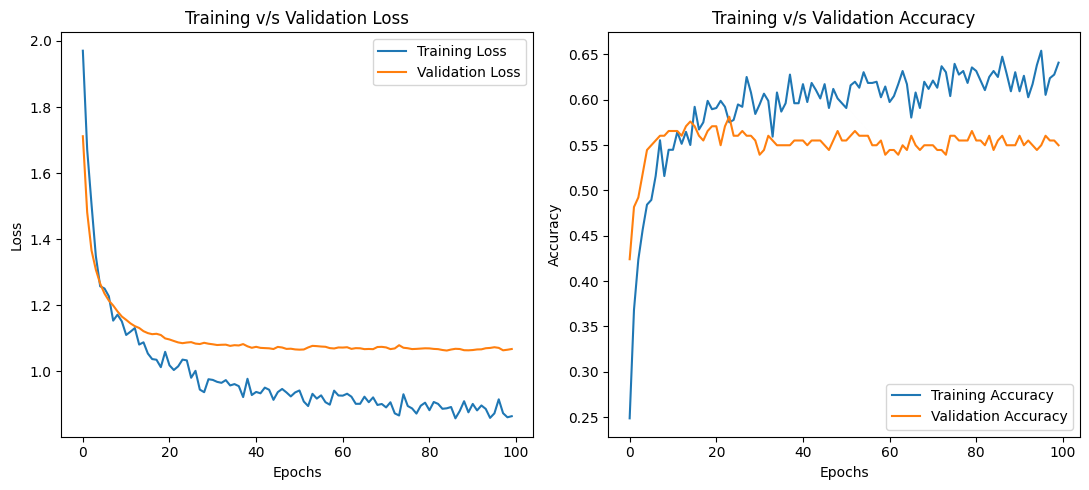

In [ ]:
plt.figure(figsize=(11, 5))

# Plotting training and validation loss
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training v/s Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Plotting training and validation accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training v/s Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

### Model 2 performance with Test data

In [ ]:
y_pred = model.predict(X_test_scaled)

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


In [ ]:
import numpy as np

y_pred_final=[]

for i in y_pred:
  y_pred_final.append(np.argmax(i))

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(Y_Test,y_pred_final))

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         3
           4       0.00      0.00      0.00        19
           5       0.55      0.80      0.65       167
           6       0.53      0.42      0.47       172
           7       0.41      0.25      0.31        44
           8       0.00      0.00      0.00         3

    accuracy                           0.53       408
   macro avg       0.25      0.25      0.24       408
weighted avg       0.49      0.53      0.50       408



## **Training vs. Validation Loss:**

**Original Model:**

* Started with a training loss of 2.0772  and a validation loss of 1.7116.
Generally decreased with fluctuations, reaching a final training loss of 0.3276 and validation loss of 1.7889.
* The gap between training and validation loss persisted and varied over epochs.

**Updated Model:**

* Started with a training loss of 2.0772 and a validation loss of 1.7116.
* Steadily decreased with fluctuations, ending with a training loss of 0.8687 and a validation loss of 1.0674.
* Showed a consistent reduction in the gap between training and validation loss compared to the original model.

## **Training vs. Validation Accuracy:**

**Original Model:**

* Began with a training accuracy of 0.1998 and a validation accuracy of 0.4921.
* Increased over epochs, reaching a training accuracy of 0.8741 and a validation accuracy of 0.5183.
* There was a consistent gap between training and validation accuracy throughout the epochs.

**Updated Model:**

* Started with a training accuracy of 0.1925 and a validation accuracy of 0.4241.
* Progressed to a training accuracy of 0.6174 and a validation accuracy of 0.5497.
* Reduced the gap between training and validation accuracy compared to the original model.

**Test Data Performance**
* As we can see from classification matrix that orignal model accuracy is 0.52 while Updated Model accuracy has been improved to 0.53

## **Insights:**

* Both models showed signs of overfitting, but the updated model demonstrated improvements in reducing overfitting tendencies.
* The updated model presented a steadier convergence of training and validation metrics compared to the original model, indicating better generalization.
* Despite the reduction in the gap between metrics, there's still room for improvement in reducing overfitting further and improving generalization in the updated model.

# <center><span style="font-family: Arial; font-weight:bold;font-size:2em;">PART - B</center>
---



**Description**

**Context**

Recognising multi-digit numbers in photographs captured at street level is an important component of modern-day map making. A classic example of a corpus of such street-level photographs is Google’s Street View imagery composed of hundreds of millions of geo-located 360-degree panoramic images.

The ability to automatically transcribe an address number from a geo-located patch of pixels and associate the transcribed number with a known street address helps pinpoint, with a high degree of accuracy, the location of the building it represents.

More broadly, recognizing numbers in photographs is a problem of interest to the optical character recognition community.

While OCR on constrained domains like document processing is well studied, arbitrary multi-character text recognition in photographs is still highly challenging. This difficulty arises due to the wide variability in the visual appearance of text in the wild on account of a large range of fonts, colors, styles, orientations, and character arrangements.

The recognition problem is further complicated by environmental factors such as lighting, shadows, specularity, and occlusions as well as by image acquisition factors such as resolution, motion, and focus blurs.

In this project, we will use the dataset with images centered around a single digit (many of the images do contain some distractors at the sides). Although we are taking a sample of the data which is simpler, it is more complex than MNIST because of the distractor

**Objective**

**Part B:**

To build a digit classifier on the SVHN (Street View Housing Number) dataset.

**Data Dictionary**

**Part B**

The SVHN is a real-world image dataset for developing machine learning and object recognition algorithms with the minimal requirement on data formatting but comes from a significantly harder, unsolved, real-world problem (recognizing digits and numbers in natural scene images). SVHN is obtained from house numbers in Google Street View images.

Where the labels for each of these images are the prominent number in that image i.e. 2,6,7 and 4 respectively. The dataset has been provided in the form of h5py files

Part B - Q1 A - Read the .h5 file and assign to a variable.

Part B - Q1 B - Print all the keys from the .h5 file.

In [34]:

file_path = '/content/drive/MyDrive/AIMLCourse/NeuralNetworkProject/Autonomous_Vehicles_SVHN_single_grey1.h5'

# Open the .h5 file in read mode
with h5py.File(file_path, 'r') as f:
  # Access the data within the file
  print(f.keys())
  # Access the datasets
  X_train = f['X_train'][:]
  X_test = f['X_test'][:]
  X_val = f['X_val'][:]
  y_train = f['y_train'][:]
  y_test = f['y_test'][:]
  y_val = f['y_val'][:]


<KeysViewHDF5 ['X_test', 'X_train', 'X_val', 'y_test', 'y_train', 'y_val']>


** Observation **
* The data is already splitted into X_train, X_test, Y_train, Y_test

Part B - Q1 C - Split the data into X_train, X_test, Y_train, Y_test

The data is already splitted into X_train, X_test, Y_train, Y_test as we saw in previous question.

### Data Visualisation and preprocessing

Part B - Q2 A - Print shape of all the 4 data split into x, y, train, test to verify if x & y is in sync.

In [35]:
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)


X_train shape: (42000, 32, 32)
y_train shape: (42000,)
X_test shape: (18000, 32, 32)
y_test shape: (18000,)


** Observation **
* We can notice that X & y dataset are in sync.

Part B - Q2 B - Visualise first 10 images in train data and print its corresponding labels

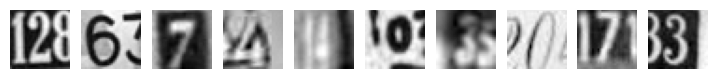

Labels for the first 10 images in the training set:
[2 6 7 4 4 0 3 0 7 3]


In [36]:
plt.figure(figsize=(9, 1))
for i in range(10):
    plt.subplot(1, 10, i + 1)
    plt.imshow(X_train[i], cmap='gray')
    plt.axis('off')
plt.show()

# Print the corresponding labels
print("Labels for the first 10 images in the training set:")
print(y_train[:10])

Part B - Q2 C -Reshape all the images with appropriate shape update the data in same variable.

In [37]:
# Reshape the images in the dataset
X_train = np.reshape(X_train, (X_train.shape[0], 32, 32, 1))
X_test = np.reshape(X_test, (X_test.shape[0], 32, 32, 1))

print("Updated shapes after reshaping:")
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)

Updated shapes after reshaping:
X_train shape: (42000, 32, 32, 1)
X_test shape: (18000, 32, 32, 1)


Part B - Q2 D - Normalise the images i.e. Normalise the pixel values.

In [38]:
# Normalize pixel values
X_train = X_train / 255.0
X_test = X_test / 255.0

In [39]:
#Print total Number of classes in the Dataset.
num_classes=len(np.unique(y_test))
print("Total number of classes in the dataset:", len(np.unique(y_test)))

Total number of classes in the dataset: 10


Normalizing pixel values involves scaling them to be in a standard range. For image data, it's common to normalize the pixel values between 0 and 1 by dividing each pixel value by the maximum pixel value (255 for images with pixel values ranging from 0 to 255).

Part B - Q2 E - Transform Labels into format acceptable by Neural Network

In [40]:
# Transform labels to categorical
y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)

Part B - Q2 F - Print total Number of classes in the Dataset.

In [41]:
print("Total number of classes in the dataset:",num_classes);

Total number of classes in the dataset: 10


Part B - Q3 A - Design a Neural Network to train a classifier.

In [ ]:
# Define the neural network model
model = models.Sequential()

# Flatten the input data
model.add(layers.Flatten(input_shape=(32, 32)))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(num_classes, activation='softmax'))

# Compile the model
model.compile(optimizer='adam',
              loss='CategoricalCrossentropy',
              metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_1 (Flatten)                  │ (None, 1024)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 128)                 │         131,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_12 (Dense)                     │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 140,106 (547.29 KB)

 Trainable params: 140,106 (547.29 KB)

 Non-trainable params: 0 (0.00 B)

Part B - Q3 B - Train the classifier using previously designed Architecture (Use best suitable parameters).

In [ ]:
history = model.fit(X_train, y_train,
                    epochs=50,
                    batch_size=64,
                    validation_split=0.2)

Epoch 1/50
525/525 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.1104 - loss: 2.3111 - val_accuracy: 0.2505 - val_loss: 2.1150
Epoch 2/50
525/525 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.3143 - loss: 1.9359 - val_accuracy: 0.4492 - val_loss: 1.6084
Epoch 3/50
525/525 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.4799 - loss: 1.5406 - val_accuracy: 0.5567 - val_loss: 1.3707
Epoch 4/50
525/525 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.5582 - loss: 1.3496 - val_accuracy: 0.6033 - val_loss: 1.2582
Epoch 5/50
525/525 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5979 - loss: 1.2487 - val_accuracy: 0.6325 - val_loss: 1.1932
Epoch 6/50
525/525 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6299 - loss: 1.1776 - val_accuracy: 0.6508 - val_loss: 1.1383
Epoch 7/50
525/525 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6486 - loss: 1.1223 - val_accuracy: 0.6658 - val_loss: 1.0987
Epoch 8/50
525/525 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6632 - loss: 1.0793 - val_accuracy: 0.

Part B - Q3 C - Evaluate performance of the model with appropriate metrics.


In [ ]:
y_pred=model.predict(X_test)

563/563 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


In [ ]:
# Convert one-hot encoded y_test to integer labels
y_test_int = np.argmax(y_test, axis=1)

In [ ]:
# Convert predictions to class labels
y_pred_classes = np.argmax(y_pred, axis=1)

In [ ]:
print(classification_report(y_test_int, y_pred_classes))

              precision    recall  f1-score   support

           0       0.80      0.80      0.80      1814
           1       0.77      0.81      0.79      1828
           2       0.77      0.80      0.78      1803
           3       0.71      0.71      0.71      1719
           4       0.77      0.83      0.80      1812
           5       0.72      0.75      0.74      1768
           6       0.71      0.80      0.75      1832
           7       0.84      0.75      0.80      1808
           8       0.78      0.67      0.72      1812
           9       0.78      0.70      0.74      1804

    accuracy                           0.76     18000
   macro avg       0.76      0.76      0.76     18000
weighted avg       0.76      0.76      0.76     18000



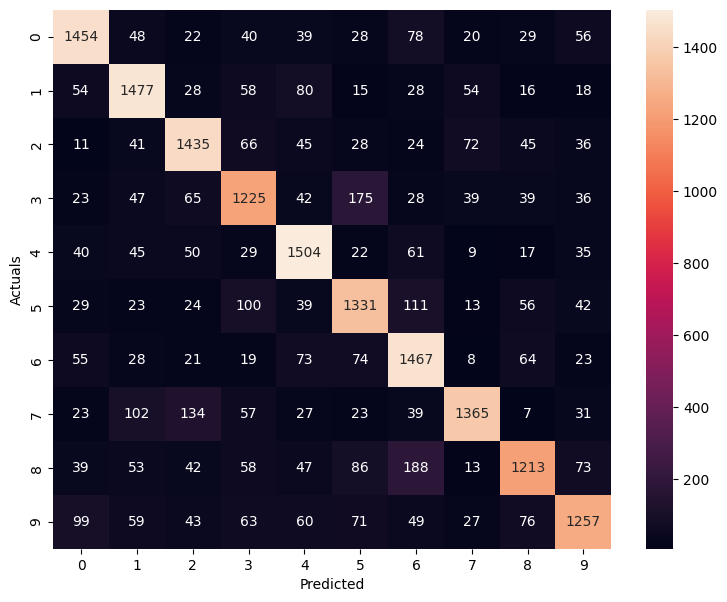

In [ ]:
cm=confusion_matrix(y_test_int,y_pred_classes)

plt.figure(figsize=(9,7))
sns.heatmap(cm,annot=True,fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actuals')
plt.show()

Part B - Q3 D - Plot the training loss, validation loss vs number of epochs and training accuracy, validation accuracy vs number of epochs plot and write your observations on the same.

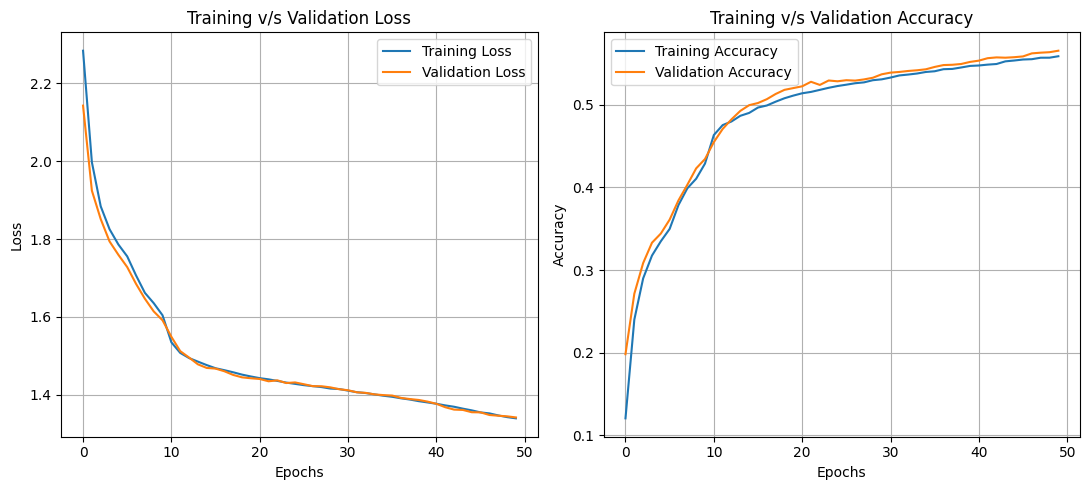

In [ ]:
plt.figure(figsize=(11, 5))

# Plotting training and validation loss
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training v/s Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

# Plotting training and validation accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training v/s Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

### **Training and Validation Loss:**

* Both training and validation loss initially decreased significantly in the early epochs, indicating the model was learning and generalizing well.
* There's a consistent decreasing trend in both training and validation loss up to around epoch 20.
* After epoch 20, the validation loss seems to fluctuate slightly while the training loss continues to decrease, indicating possible overfitting as the model might be fitting too closely to the training data.

### **Training and Validation Accuracy:**

* The training accuracy consistently increased with each epoch  to  reaching around 78.74% at epoch 50.
* Validation accuracy also increased but appeared to stagnate after around epoch 42, hovering around 75-76%, suggesting the model's performance plateaued and might not improve significantly beyond this point.

### Perfomance with Test data

* Received perfomance similar around Train and Test data i.e. around 76%

### **Overfitting:**

* Model seems to be giving generalized performance don't see much sign of overfitting as Train , validation and test accuracy are quite similar